# 회귀 모델 유형

* 머신러닝은 크게 두가지 유형이 있습니다.
  * 지도학습과 비지도학습이죠
    * 지도학습(Supervised Learning)은 정답데이터를 알려주고 학습 시킨뒤 결과를 예측하는 분야이고 
    * 비지도 학습(Unsupervised Learning)은 정답데이터가 없는 데이터들을 가지고 학습과 예측을 하는 분야이다.
  * 우리가 전에 다룬 타이타닉은 생존여부 레이블이 있었기 때문에 '지도학습'에 속한다

* 그런데 이 지도 학습에도 또 두가지 분야로 나뉜다. 
  * 바로 분류(Classification)와 회귀(Regression)이다. 
      * 분류는 데이터들을 받아서 카테고리형으로 분류가 가능한 형태를 말한다. 
      * 예를 들어 신문기사를 머신이 읽고나서 이게 스포츠 기사인지, 여예관련 기사인지, 정치관련 기사인지 나눌수 있는 형태이다. 
      * 우리가 전에 다룬 타이타닉 또한 '생존'과 '망' 두가지 카테고리로 나눌수 있기 때문에 이 또한 분류에 속한다

* 그렇다면 회귀란 무엇일까요 뭐.. 늘 그렇듯, 시작은 왜이런걸 궁금해 했을까에서부터 시작됐습니다. 
  * 영국의 통계학자인 갈톤(Galton)은 부모의 키가 모두 클때 자식의 키가 크긴하지만 그렇다고 부모를 엄청 능가할정도로 크지 않고, 부모의 키가 모두 작을때 자식도 작긴 하지만 그렇다고 부모를 엄청 능가할정도로 작거나 하지 않는다는걸 발견했다.
 
* 즉 사람의 키는 평균 키로 **회귀** 하려는 경향을 가진다는 자연의 법칙이 있다는 것을 알아낸것이다

* 분류와 회귀의 차이에 대해 알아보자
자동차와 관련된 5종류의 데이터(독립변수 'x' 라고 하자) 를 받았다. 자동차의 크기(x1), 출력(x2), 제조국가(x3), 연식(x4) 그리고 판매량(x5) 에 대한 데이터를 각각 10000 개씩 받았다고 가정하자. 


지도학습이기 때문에 정답데이터(종속변수'y'라고 부르자) 또한 10000를 할당 받을것이다. 

이때 우리가 예측하고자 하는 종속 변수 y가 이산값인지 연속값인지 에 따라 분류와 회귀 문제로 나뉜다

만약 독립변수 x1~x5를 가지는 데이터의 종속변수 y가 '자동차 브랜드'라고 가정하면 벤츠, BMW, 현대 도요타 등 브랜드 별 카테고리로 나눌수 있고, 이러한 문제가 '분류'에 속한다. 아주 간단한 식으로 나타내면 다음과 같다

$$Y = W_1 × X_1 + W_2 × X_2 ... W_n × X_n$$

종속 변수(정답)를 맞추기 위해 각각 독립변수 X1 ~ X5 에 W1 ~ W5 를 곱해준다
여기서 W는 독립변수의 값에 영향을 미치는 회귀계수(Regression coefficients) 이다

**머신러닝 회귀 예측의 핵심은 주어진 독립변수와 종속변수 값 기반으로 학습을 통해 최적의 회귀계수를 찾아내는 것이다**

최적의 회귀계수를 찾기 위해 경사하강법(Gradient Descent)을 통해 손실을 줄이기 위한 최적의 파라미터를 구하는 방법이나 다중, 다항, 편향, 분산, 규제 등을 배우며 머신러닝에 대해 한층 더 깊게 들어갈것이다

그전에 회귀모델의 대표적인 모델에 대해 몇가지 알아보자

| 모델명                           |  설명                                      |
|--------------------------------|-------------------------------------------|
| 일반 선형회귀                     |  규제를 적용하지 않은 모델                      |
| 라쏘(Lasso)                     |  L1 규체를 적용한 모델                        |
| 릿지(Ridge)                     |  L2 규제를 적용한 모델                        |
| 엘라스틱넷(ElasticNet)            |  L1, L2 규체를 함께 결합한 모델                |
| 로지스틱회귀(Logistic Regression) |  이름에 회귀가 붙어있지만 분류에 사용되는 선형모델    |

우리가 원하는 결과는 아래 시각화 해논것처럼 약 500개의 흩뿌려진 데이터들의 선형 관계를 찾아서 가장 이 데이터의 잘 수용하는 회귀선을 찾는 것이다. 

아래 사진은 임의로 500개의 데이터를 만들고 (y = 4x + 6) 노이즈를 섞고 이 데이터들의 최적의 w값을 찾은후 예측하고, 그 예측값에 기반하여 회귀선을 빨강색 선으로 그은것이다

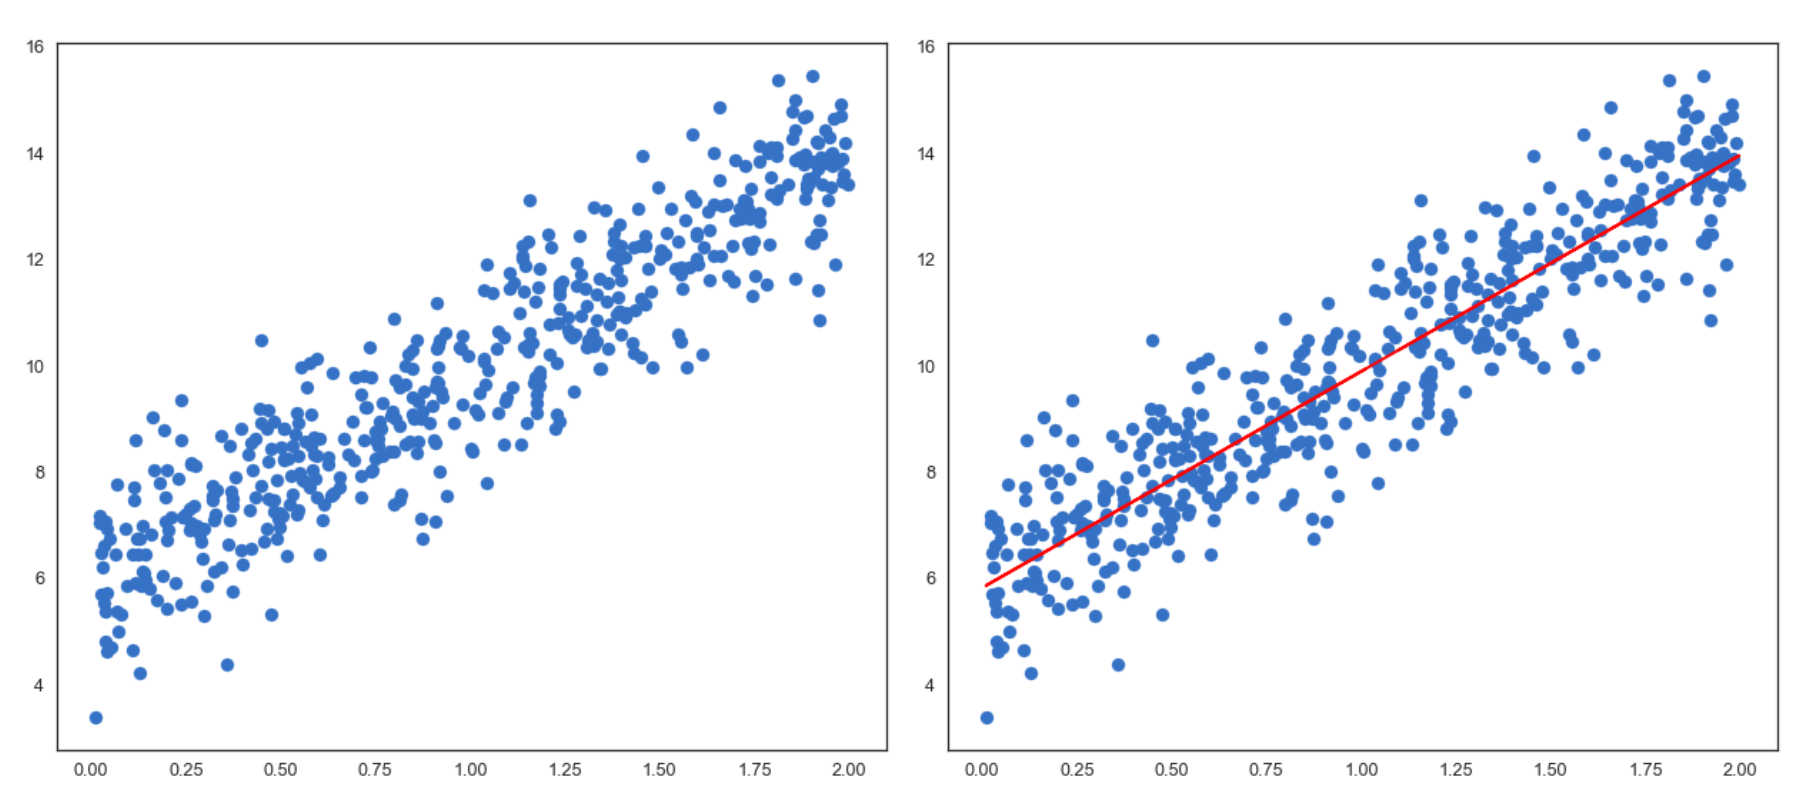

## LinearRegression

보스턴 데이터를 활용하여 간단한 선형회귀를 구현

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

boston_data = load_boston() # 보스턴데이터를 불러와서 boston_data에 저장
#print(boston_data.DESCR)    #보스턴 데이터 설명서

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

변수만 보면 CRIM(동네의 범죄율) ~ LSTAT(하위계층의 비율) 까지 총 13개의 독립변수가 있고 
종속변수가 MEDV 라는 컬럼명으로 구성되어 있을을 확인할수 있다

In [2]:
# 보스턴 데이터를 데이터 프레임으로 변환
bostonDF = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
bostonDF['Price'] = boston_data.target
bostonDF.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


첫번째 줄에서 pd.DataFrame()을 사용하여 데이터프레임 형태로 변환합니다.

첫번째 인자로 boston_data.data가 들어가는데 이게 종속변수를 뺀 나머지 독립변수 13개(CRIM ~ LSTAT)를 뜻합니다. 

이걸 bostonDF에 저장한후 bostonDF['Price']라는 새로운 컬럼을 만들어서 여기에 bosto_data.target(MEDV) 데이터를 넣어줍니다. 

MEDV는 직관적이지 않기 때문에 Price라는 컬럼명으로 바꾸고 데이터는 그대로 가져오는거죠.


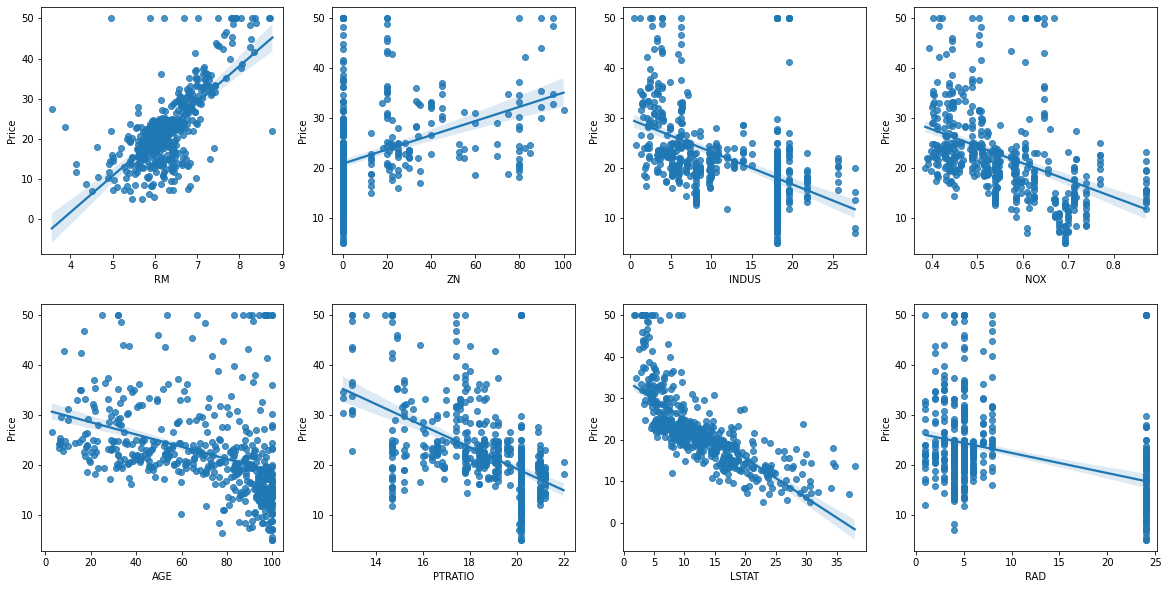

In [3]:
#위에서 선형관계를 scatter 그래프로 확인했듯 8개의 변수만 Price 와 어떤 영향도를 가지고 있는지 보기 위해 시각화 해보자

fig, axs = plt.subplots(figsize=(20, 10), ncols=4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = (i%4)
  sns.regplot(x=feature, y='Price', data=bostonDF, ax=axs[row][col])

subplot을 사용하여 총8개의 그래프를 한번에 그렸다. 가장 눈에 띄는건 'RM'과 'LSTAT' 이다. 'RM(방의 개수)' 은 양의 상관관계를 가지고 있고, 'LSTAT(하층민의 빈도)' 는 음의 상관관계를 가지고 있다. 즉, 방의 개수는 많으면 많을수록 집값은 하락하는 관계라는 의미이다


In [4]:
# LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['Price']
X_data = bostonDF.drop(['Price'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# Linear Regression OLS 로 학습/예측/ 평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))


MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


train_test_split을 이용해서 학습과 테스트데이터 세트를 분리해 학습과 예측을 수행했습니다.

그리고 metrics 모듈의 mse(mean_squared_error)와 r2_score 메서드를 이용해 MSE와 R2스코어를 측정해하였습니다. 

mse와, r2스코어 등등에 대해서는 오차값을 의미하는 것으로 저 회귀선이 얼마나 잘 수용하고 있는가에 대해 수치로 나타낸 것이라 생각하면된다

In [5]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_), 1)


절편 값: 40.99559517216477
회귀 계수값: [ -0.   0.   0.   3. -20.   3.   0.  -2.   0.  -0.  -1.   0.  -1.] 1


LinearRegression으로 생성한 주택가격 예측 모델은 intercept_(절편)와 coef_(회귀계수)로 정보를 제공합니다. 이 절편과 회귀계수값을 통해 하이퍼파라미터 튜닝이 이루어지니 이 intercept_와 coef_를 꼭 기억해두세요. coef_속성은 회귀계수 값만 가지고 있으니까 이걸 피처별 회귀 계수 값으로 다시 매핑해보고 영향이 큰 순서대로 다시 출력해보도록 하겠습니다.
 

In [6]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

RM이 양의 값으로 회귀 계수가 가장 큰것을 볼수있다. 근데 NOX의 -값이 말도안되게 크다.

위의 DESCR을 보면 NOX는 일산화질소의 농도인데 이게 집값에 그렇게까지 엄청난 차이로 영향을 미친다는게 이해가 잘되지 않는다

이 문제를 해결하기 위해 위에서 보았던 L1 규제와 L2 규제를 배울수 있다. 지금 저 NOX의 값이 상식으로 이해가 되는 선까지 최적화 되는것을 눈으로 보는날을 고대하며 넘어가자

5개의 폴드를 통해 교차 검증을 진행하자

### 교차검증

In [7]:
# cross_val_score

from sklearn.model_selection import cross_val_score

y_target = bostonDF['Price']
X_data = bostonDF.drop(['Price'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score() 로 5 Fold 셋으로 MSE를 구한뒤 이를 기반으로 다시 RMSE를 구함
neg_mse_scores = cross_val_score(
    lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f}: '.format(avg_rmse))


 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829: 


교차검증을 사용한 결과 RMSE 평균은 5.829로 도출되었다.


## 다항회귀

아래의 데이터 산점도를 보면

좌측 그래프처럼 데이터가 흩뿌려져 있을때, 저번에 본 선형 모델로는 이 데이터를 잘 수용하고 있다고 보기 어렵다 

우측 사진처럼 빨간색 선형이 아닌 파랑색 곡선이 이 데이터를 잘 수용하고 있는 그래프라고 볼 수 있다. 

**이렇게 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는것을 다항(Polynomial) 회귀** 라고 한다

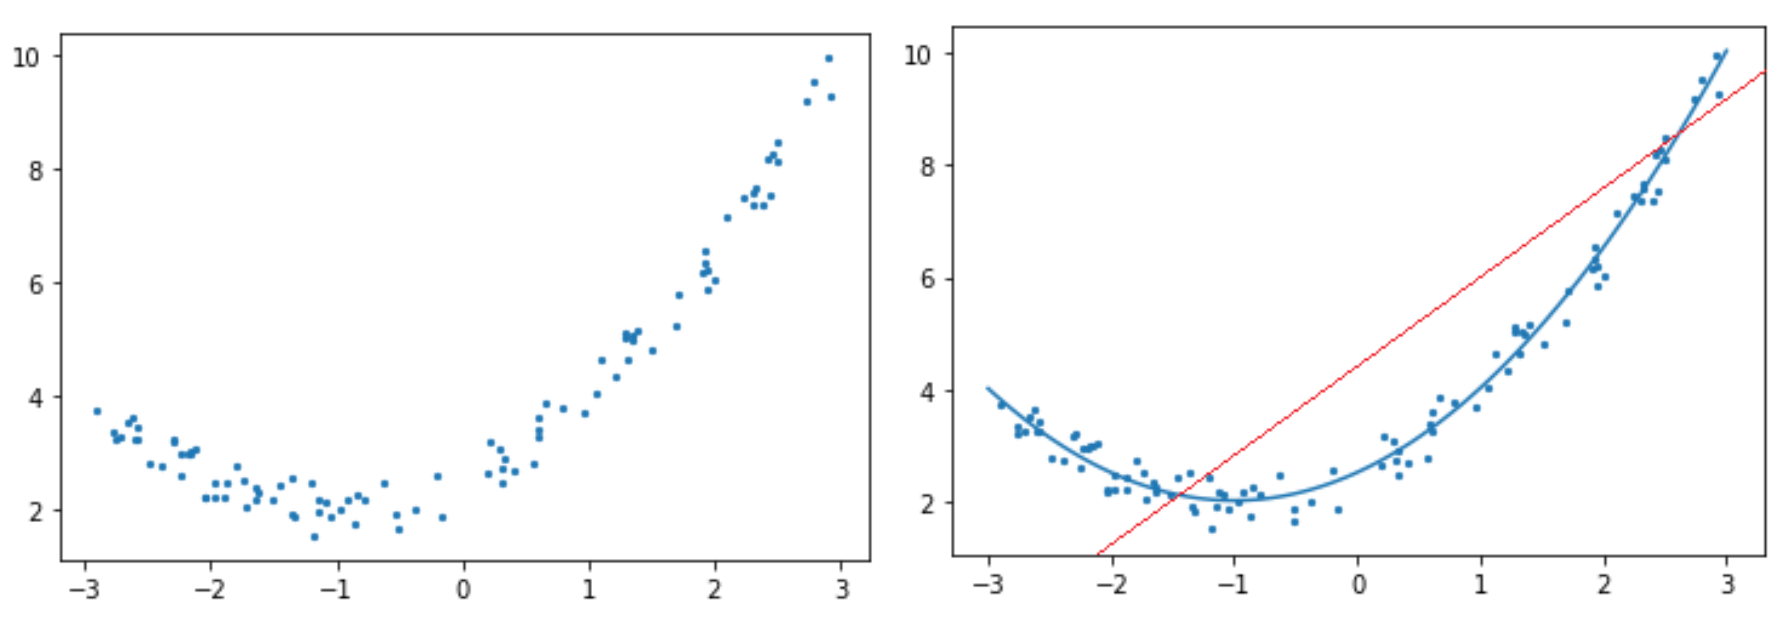

###1. 오버피팅 / 언더피팅의 이해

그런데 이런 다항 회귀에는 치명적인 단점이 존재합니다. 바로 오늘 배울 릿지와 라쏘, 그리고 엘라스틱넷이 열광받는 이유이자, 오랜시간동안(현대까지도) 머신러닝분야에서 골치아픈 주제인 과적합(Overfitting)과 과소적합(Underfitting)문제입니다. 이걸 이해하기 위해 간단한 다항회귀 코드를 구현해 살펴보도록 하죠



In [8]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0, 1], [2, 3]] 의 2x2 행렬생성

X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature:\n', X)

#degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures 를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)


일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


일차 단항식을 다항식으로 바꾸어 똑같이 돌리기만 하면 된다

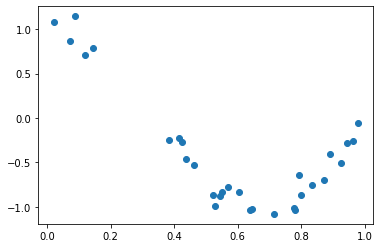

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


# random r밧으로 구성된 X 값에 대해 Cosine 변환값을 반환

def true_fun(X):
  return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 random 값을 순서대로 sampling 한 데이터 이다
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun()에서 약간의 Noise 변동값을 더한 값이다
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.scatter(X, y)

임의의 곡선 데이터를 만든다.

이제 이걸로 위에서 배운 다항식을 적용하여 회귀선을 그려보자
각각 1차, 4차 ,15차 다항식을 그려볼것이다

참고로 차수만큼 굴곡이(곡선이) 늘어난다' 라고 이해하고 넘어가셔도 좋다


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87415100e+06  2.03715130e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 입니다.
Degree 15 MSE 는 180526263.32입니다.


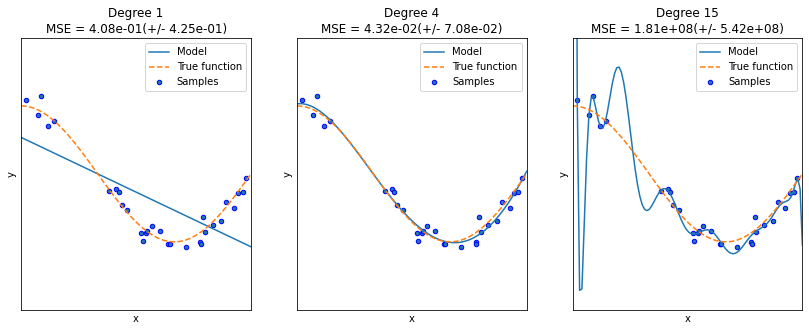

In [10]:
plt.figure(figsize=(14, 5))
degrees =[1, 4, 15]

# 다항 회귀의 차수(degrees)를 1, 4, 15로 각각 변화시키면서 비교하자

for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i + 1)
  plt.setp(ax, xticks=(), yticks=())

  #개별 degree별로 Polynomial 변환
  polynomial_features = PolynomialFeatures(
      degree=degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features",polynomial_features),
                       ("linear_regression", linear_regression)])
  pipeline.fit(X.reshape(-1, 1), y)

  #교차 검증으로 다항 회귀를 평가
  scores = cross_val_score(pipeline, X.reshape(-1, 1),
                           y, scoring="neg_mean_squared_error", cv=10)
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(
      degrees[i],np.round(coefficients), 2))
  print('Degree {0} MSE 는 {1:.2f}입니다.'.format(
      degrees[i], -1*np.mean(scores)))
  
  # 0부터 1까지 테스트 데이터 세트를 100 개로 나눠 예측을 수행한다
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교한다
  X_test = np.linspace(0, 1, 100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
  # 실제값 곡선
  plt.plot(X_test, true_fun(X_test), '--', label="True function")
  plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

  plt.xlabel("x")
  plt.ylabel("y")
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.legend(loc="best")
  plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()
  
  

그림에서 파랑색 Model 실선이 다항회귀예측 곡선이다. 주황색 점선 True function 이 실제 데이터 세트 X, Y의 코사인 곡선이다. 맨 왼쪽부터 살펴보면

1. Degree 1. Model 곡선이 너무 단순한 직선으로 선형회귀(일차식)와 똑같다. 예측 곡선이 **학습데이터의 패턴을 제대로 반영하지 못하고 있는 과속 적합 모델**이 됐다. MSE값이 약 0.408이다

2. Degree 2. Model 곡선이 실제 True function 점선과 가장 유사한 모습을 보인다. 변동 하는 잡을까지 전부 잡아내지는 못했지만, 학습 데이터세트를 비교적 잘 반영했다. MSE 값은 약0.043 이다

3. Degree 3. Model 곡선의 MSE값이 약 180526263.32 가 될정도로 엄청난 오류값을 보였다. 파랑색 곡선을 보면 변동하는 잡음까지 잡아내려 지나치게 반영하여 학습한 결과, **학습데이터 세트는 정확하게 예측한 하였지만 실제 데이터세트와는 전형 다른 곡선 형태를 나타내고 있다. 이것이 과적합 또는 과대적합 모델이다**

###2. 편향 - 분산 트레이드 오프(Bias - Variance Trade off)

위의 모델을 다시한번 보자. **Degree1 은 매우 단순하여 지나치게 한 방향으로 치우친 모델이다. 이런 모델을 고편향(High-Bias)성을 가진 모델**이라고 한다. 반대로 **Degree15는 매우 복잡하여 지나치게 높은 변동성을 가지게 된다 이러한 모델을 고분산(High-Variance)성을 가진 모델**이라고 표현한다

일반적으로 편향과 분산은 한 쪽이 높으면 한쪽이 낮아지는 경향이 있다. 쉽게 말해서, 편향이 높으면 분산이 낮은것을 과소 적합이라 한다. 반대로, 편향이 낮고 분산이 높으면 이를 과대적합이라고 한다. 그럼 반대로 편향을 낮추면 분산이 높아질것이다. 편향이 너무 높으면 전체 오류가 높으니까 편햐을 점점 낮추면서 동시에 분산을 높이면 전체 오류도 낮아지게 된다. 그리고 전체 오류가 가장 낮아지는 '골디락스'지점을 통과 하면 점점 분산이 더 높아지고 편향이 더욱더 낮아지게 되면서 오류가 다시 커지는것이다

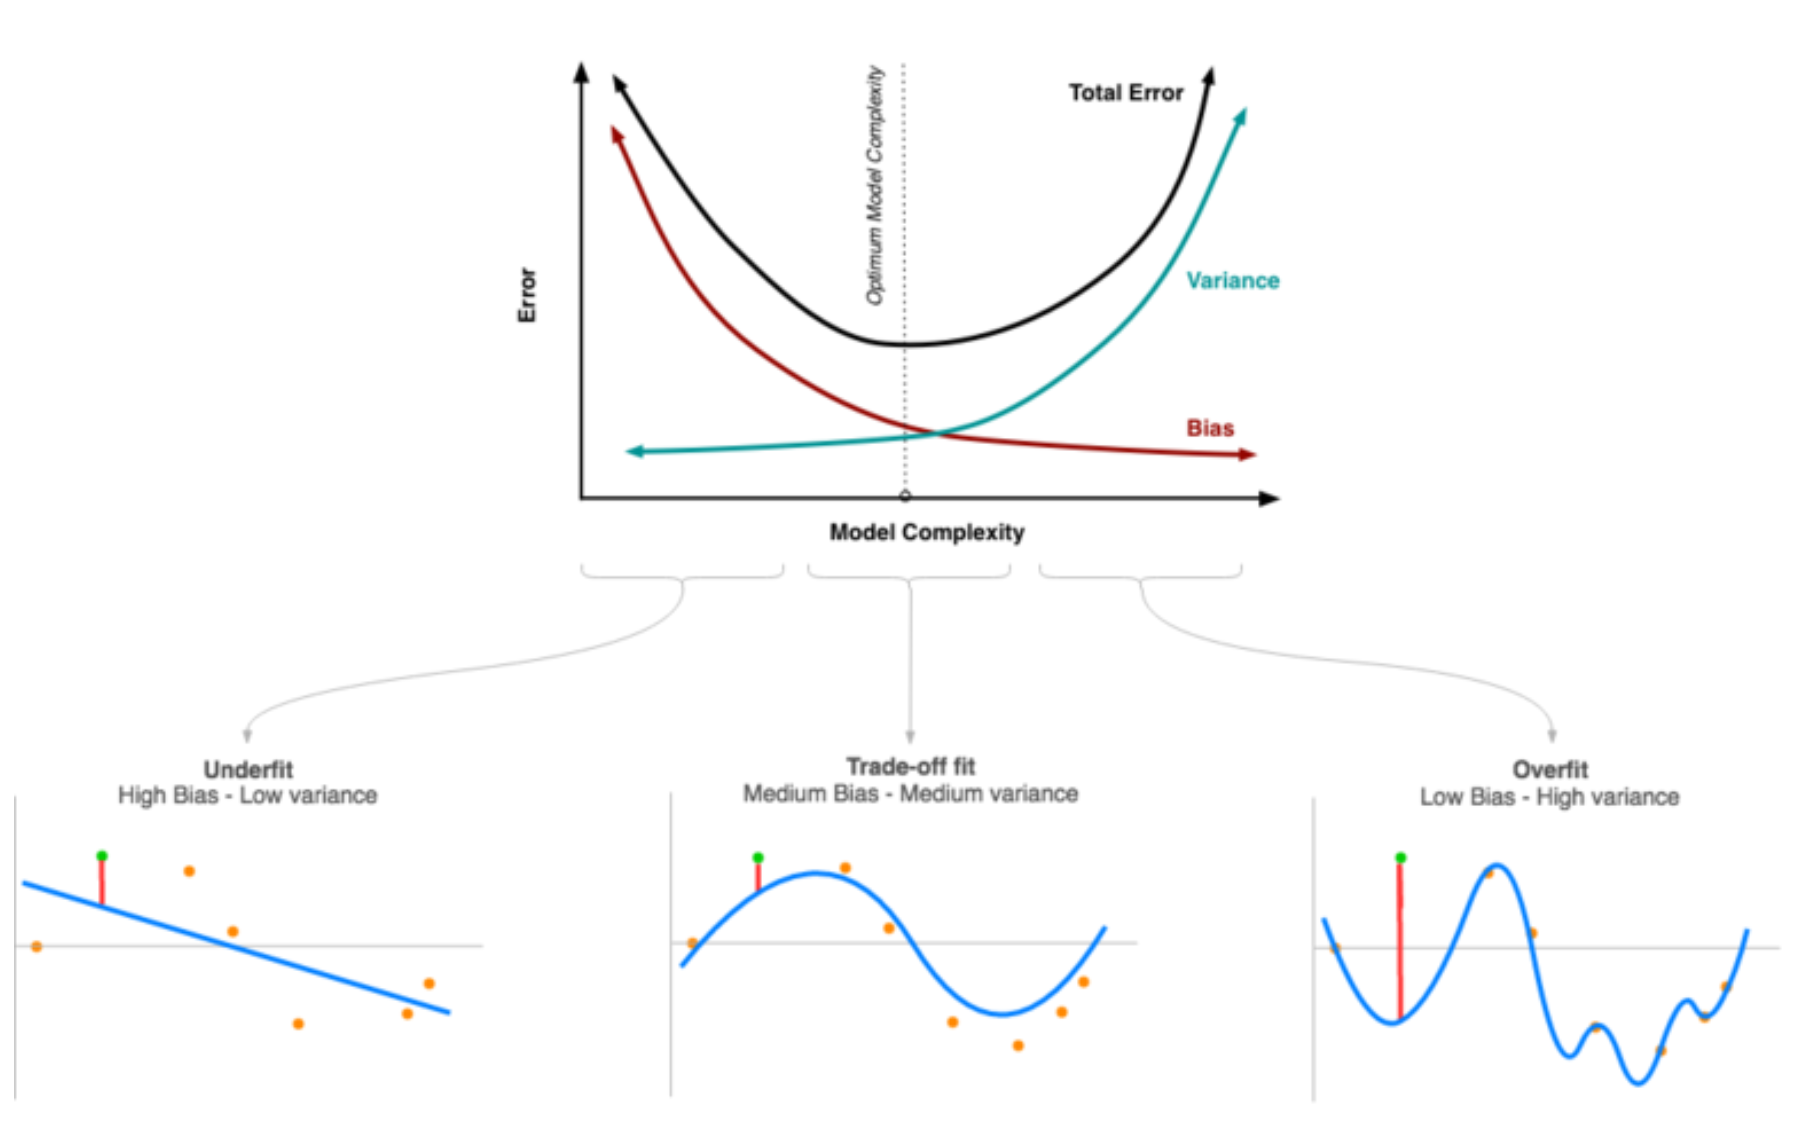

높은편향/낮은분산에서 과소적합이 되며, 낮은편향/높은분산에서 과대적합이 되는걸 알았고 이 골디락스 지점에서 오류가 최소화 된다는것 또한 알았다. 그래서 편향과 분산이 서로 트레이드 오프를 이루면서 오류 cost값이 최대로 낮아지는 모델을 구축해야한다

###3. L2의 릿지와 L1의 라쏘 그리고 엘라스틱넷

우리는 저 최적의 발란스를 찾기위해 비용함수의 목표를 다음과 같이 설정할수 있다

$$비용함수목표=Min(RSS(W)+alpha×||W||_2^2)$$

여기서 alpha를 집중적으로 보면된다


alpha는 회귀 계수값의 크기(위에서 Degree)제어를 수행해주는 튜닝 파라미터이다. 식을 완전히 이해할필요는 없고 이것만 기억하자 **alpha를 크게하면 비용함수는 회귀 계수 W의 값을 작게 해 과대 적합을 개선할수 있으며, alpha를 작게하면 회귀계수 W의 값이 커져도 어느정도 상쇄가 가능하기 때문에 과소적합에 대해 개선**이 가능합니다. 그래서 우리는 alpha 를 0에서 부터 지속적으로 값을 증가 시키면서 회귀 계수 값의 크기를 감소 시킬수 있습니다. 이렇게, **alpha값으로 패널티를 부여(튜닝 파라미터로 인한 가중치 제어)해 회귀 계수값의 크기를 감소 시켜 과대/소 적합을 개선하는 방식을 규제(Regularization) 이라고 부른다**

규제는 크게 L2와 L1 방식으로 두가지 방식이 있다

#### Ridge

In [11]:
# 앞의 LinearRegression 예제에서 분할한 feature 데이터 셋인 X_data 와 Target 데이터 셋인 Y_target데이터 셋을 그대로 이용
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston

# boston 데이터 셋 로드
boston = load_boston()

#boston 데이터 셋 DataFrame변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE컬럼으로  DataFrame에 추가함
bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f}'. format(avg_rmse))


Boston 데이터셋 크기 : (506, 14)
 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

릿지 모델을 sklearn 에서 Ridge를 통해 임포트 할수있다. 보스턴 데이터셋을 로드후 NOX(일산화질소)가 집값에 매우 큰영향을 끼치므로 Ridge 의 alpha를 조절해 가며 성능을 개선시켜보자

In [12]:
#Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0, 0.1, 1, 10, 100]

#alpha list값을 iteration 하면서 alpha에 따른 평균 rmse구함
for alpha in alphas :
  ridge = Ridge(alpha = alpha)

  #cross_val_score를 이용하여 5 fold 의 평균 RMSE 계산
  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  print('alpha {0} 일 때 5 fold 의 평균 RMSE  : {1:.3f} '.format(alpha, avg_rmse))

alpha 0 일 때 5 fold 의 평균 RMSE  : 5.829 
alpha 0.1 일 때 5 fold 의 평균 RMSE  : 5.788 
alpha 1 일 때 5 fold 의 평균 RMSE  : 5.653 
alpha 10 일 때 5 fold 의 평균 RMSE  : 5.518 
alpha 100 일 때 5 fold 의 평균 RMSE  : 5.330 


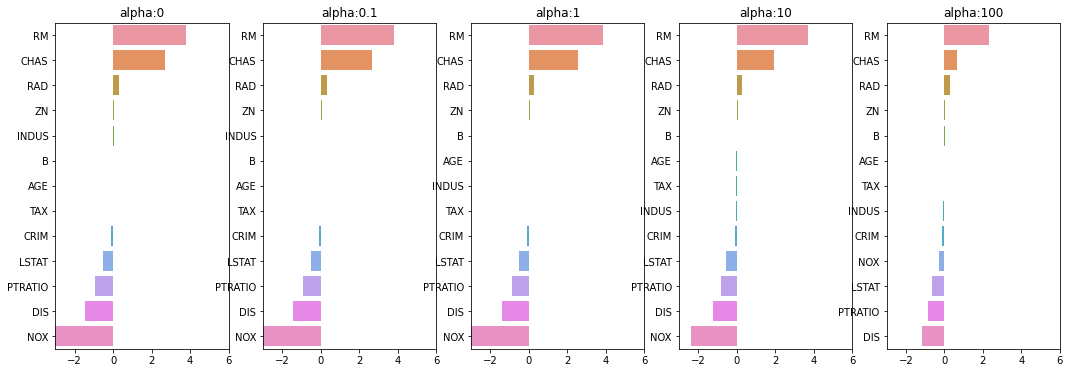

In [13]:
# 각 alpha에 따른 회귀 계수 값을 시각화 하기 위해 5개의 열로 된 맷플로립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha 에 따른 회구 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis 의 위치 지정
for pos, alpha in enumerate(alphas) :
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_data, y_target)
  # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
  coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
  colname='alpha:'+str(alpha)
  coeff_df[colname] = coeff
  # 막대 그래프로 각 alpha 값에서 회귀 계수를 시각화. 회귀 계수값이 높은순으로 표현
  coeff = coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3,6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha 에 따른 치러별 회귀 계수를 DataFrame 으로 표시
plt.show()

alpha 값이 증가하면서 NOX 값이 줄어드는 것을 확인할수 있다. 과대적합이 해결된것이다
이제 회귀계수를 데이터 프레임 형태로 확인해보자

In [14]:
ridge_alphas  = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


alpha의 값이 늘어남에 따라 NOX의 회귀 계수가 크게 작아졌지만 0으로 만들지는 않는다. 이게 L2규제와 L1 규제의 가장큰 차이점이다

이번엔 라쏘 모델로 한번보자

####Lasso

In [15]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame 으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                        verbose=True, return_coeff=True):
  coeff_df = pd.DataFrame()
  if verbose : print('###### ', model_name , '######')
  for param in params:
    if model_name == 'Ridge': model = Ridge(alpha=param)
    elif model_name == 'Lasso':model = Lasso(alpha=param)
    elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.4)
    neg_mse_scores = cross_val_score(model, X_data_n,
                                     y_target_n, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}일때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
    # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출

    model.fit(X_data_n, y_target_n)
    if return_coeff:
      #alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
      coeff = pd.Series(data=model.coef_ , index=X_data_n.columns)
      colname='alpha:'+ str(param)
      coeff_df[colname] = coeff

  return coeff_df 

# 라쏘에 사용될 alpha  파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

######  Lasso ######
alpha 0.07일때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일때 5 폴드 세트의 평균 RMSE: 6.189 


In [16]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


**alpha의 크기가 증가함에 따라 일부 피처의 회귀 계수를 아예 0으로** 만들어 버린다. NOX 의 경우  0.07일때부터 이미 회귀 계수를 0으로 만들어 버린다. alpha를 증가시키면서 INDUS, CHAS등의 속성의 회귀 계수또한 0으로 만든다. **회귀계수가 0인 피처(변수, 특징)는 회귀 식에서 제외되면서 피처선택의 효과**를 얻을수있다.

두모델의 성능을 봤을때, 이 보스턴 집값예측에 더 잘어울리는 모델은 단순 결과만 놓고보면 릿지모델이 5.33, 라쏘모델이 5.612로 릿지가 조금 더 좋아보인다. 하지만 **모든 데이터에 대해 L2규제를 적용한 릿지 모델이 성능이 좋다고 단언할수 없다.** 그래서 나온 모델이 **엘라스틱넷 회귀모델**이다

엘라스틱넷 회귀는 L2와 L1의 규제를 결합한 회귀이다. 이 클래스의 주요 파라미터는 alpha 와 l1_ratio 이다. 주의 해야할것은 엘라스틱넷의 alpha는 릿지와 라쏘의 alpha와 다르다. **엘라스틱넷의 규제는 (a×L1 + b×L2) 로 정의되며 a는 라쏘의 알파값, b는 릿지의 알파값이다**
따라서 **엘라스틱넷의 alpa 값은 a+b가 된다. l1_ration는 이름에서도 알수 있다 싶이 L1규제의 비율이다 a / (a+b) 로 정의 된다** 만약 l1_ratio가 1이면 brk 0을 뜻하므로 단순 L1규제 모델과 동일하게 볼수 있다

####ElasticNet

In [17]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출

elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                       X_data_n=X_data, y_target_n=y_target)

######  ElasticNet ######
alpha 0.07일때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 0.1일때 5 폴드 세트의 평균 RMSE: 5.458 
alpha 0.5일때 5 폴드 세트의 평균 RMSE: 5.395 
alpha 1일때 5 폴드 세트의 평균 RMSE: 5.494 
alpha 3일때 5 폴드 세트의 평균 RMSE: 5.883 


l1_ratio는 릿지모델의 성능이 더 좋았기에 0.4로 L2의 비중을 좀더 높게 주었다. 이걸 조정하고싶다면 get_linear_reg_eval()에서 elif model_name=='ElasticNet':model=ElasticNet(alpha=param, l1_ratio=0.4) 이부분의 l1_ratio=0.4 를 본인이 원하는값으로 수정하면 된다. l1_ratio가 0.4일때 엘라스틱넷의 alpha(a+b)는 0.5 에서 최고의 RMSE값 5.395 가 나왔다

In [18]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.386790,3.178648,1.652609,0.932609,0.122582
CHAS,1.269843,0.991341,0.000000,0.000000,0.000000
RAD,0.286247,0.291489,0.316315,0.307474,0.220108
ZN,0.050948,0.051697,0.054484,0.053697,0.048372
B,0.009997,0.009910,0.008954,0.008347,0.007447
AGE,-0.008533,-0.006620,0.010188,0.020785,0.036895
TAX,-0.014693,-0.015007,-0.016406,-0.016534,-0.014392
INDUS,-0.046437,-0.046815,-0.035430,-0.018986,-0.000000
CRIM,-0.100709,-0.100561,-0.094153,-0.083672,-0.050807
NOX,-0.567317,-0.210907,-0.000000,-0.000000,-0.000000


회귀 계수를 살펴보면 엘라스틱넷 또한 회귀 계수를 0으로 만들지만 라쏘 모델처럼 극단적인 형태로 0을 만들지는 않는것을 확인할수 있다